In [828]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# %matplotlib inline #skip plt.show, show the image directly

data = pd.read_csv("indian_liver_patient.csv")

In [829]:
data['Dataset'] = data['Dataset'].map({2:0,1:1}) 

In [830]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [831]:
#Imputing values
data['Albumin_and_Globulin_Ratio']=imp.fit_transform(data[['Albumin_and_Globulin_Ratio']])

In [832]:
data.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [833]:
data.describe()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [834]:
data = pd.get_dummies(data)

In [835]:
#Replacing Male and Female with 1 and 0
# data['Gender'] = data['Gender'].apply(lambda x:1 if x == 'Male' else 0)

In [836]:
data.nunique()


Age                            72
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
Gender_Female                   2
Gender_Male                     2
dtype: int64

In [837]:
#Now it's time to see the correlation
data.corr().style.background_gradient(cmap='coolwarm')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,0.137351,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,0.220208,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,0.246046,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,0.184866,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,0.163416,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,0.151934,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,-0.035008,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,-0.161388,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.215968,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,-0.162144,0.003184,-0.003184
Dataset,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.162144,1.000000,-0.082416,0.082416


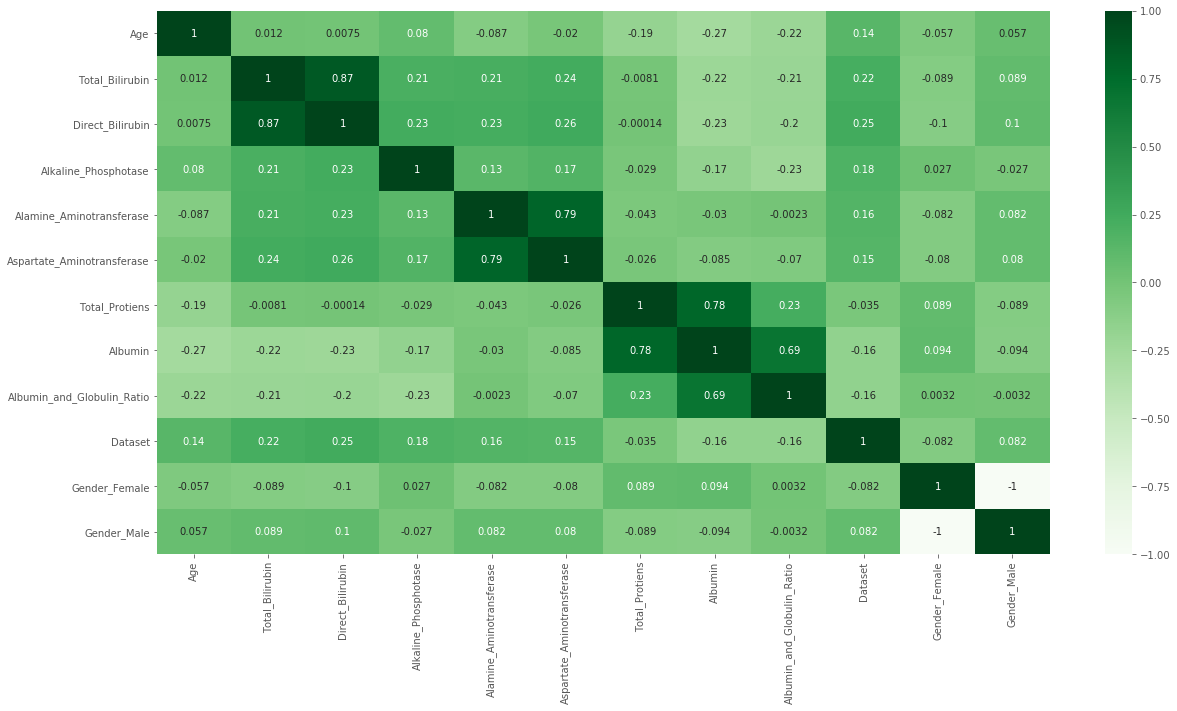

In [838]:
corr = data.corr()
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

In [839]:
corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,0.137351,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,0.220208,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,0.246046,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,0.184866,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,0.163416,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,0.151934,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,-0.035008,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,-0.161388,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.215968,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,-0.162144,0.003184,-0.003184
Dataset,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.162144,1.000000,-0.082416,0.082416


In [840]:
#Importing variance inflation factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [841]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [842]:
#Making New Data Sets for Computation
#Select all rows except for the Target variable
Test_Set_Var = data.iloc[:,:10]

df = pd.DataFrame()
df["vif_index"] = [vif(Test_Set_Var.values, i) for i in range(Test_Set_Var.shape[1])]
df["features"] = Test_Set_Var.columns
df.sort_values(by = 'vif_index', ascending=False)

,vif_index,features
7,131.738769,Albumin
6,101.266980,Total_Protiens
8,24.736263,Albumin_and_Globulin_Ratio
0,7.883187,Age
2,5.757412,Direct_Bilirubin
1,5.478942,Total_Bilirubin
9,3.925226,Dataset
4,3.339344,Alamine_Aminotransferase
5,3.196163,Aspartate_Aminotransferase
3,2.685515,Alkaline_Phosphotase


In [843]:
# gender_data = data[['Gender', 'Dataset']].groupby('Gender', as_index = False).agg(np.sum)
# gender_data

In [844]:
data

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1


In [845]:
data.shape


(583, 12)

In [846]:
# removing outliers from certain features and printing len after outliers have been removed
print('Original dataset:',len(data))
data = data[data.Total_Bilirubin < 40]
data = data[data.Direct_Bilirubin < 15.0]
data = data[data.Alkaline_Phosphotase < 1250]
data = data[data.Alamine_Aminotransferase < 1000]
data = data[data.Aspartate_Aminotransferase < 2000]
data = data[data.Albumin_and_Globulin_Ratio < 2.0]
print('After removing outliers:',len(data))

data.shape


Original dataset: 583
After removing outliers: 560


(560, 12)

In [847]:
#Importing the Necessary Modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score


In [848]:
#Defining X and y as we never defined it
# X = data.iloc[:, :10]

X = data.drop(['Dataset'], axis=1)
y = data['Dataset']

In [849]:
X

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,0,1


In [850]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 560, dtype: int64

In [851]:
#Using Scaling Methods to scale the entire data set as I'm running into errors
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values

In [852]:
X

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,0.709302,0.009317,0.000000,0.116871,0.006383,0.005369,0.594203,0.521739,0.37500,1.0,0.0
1,0.674419,0.326087,0.382979,0.599434,0.057447,0.060403,0.695652,0.500000,0.27500,0.0,1.0
2,0.674419,0.214286,0.283688,0.402451,0.053191,0.038926,0.623188,0.521739,0.36875,0.0,1.0
3,0.627907,0.018634,0.021277,0.112158,0.004255,0.006711,0.594203,0.543478,0.43750,0.0,1.0
4,0.790698,0.108696,0.134752,0.124411,0.018085,0.032886,0.666667,0.326087,0.06250,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,0.003106,0.000000,0.411876,0.010638,0.016107,0.463768,0.152174,0.04375,0.0,1.0
579,0.418605,0.006211,0.000000,0.032988,0.026596,0.014094,0.478261,0.500000,0.50000,0.0,1.0
580,0.558140,0.012422,0.007092,0.171536,0.040426,0.026174,0.536232,0.500000,0.43750,0.0,1.0
581,0.313953,0.027950,0.028369,0.114043,0.020213,0.014765,0.594203,0.543478,0.43750,0.0,1.0


In [853]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 42)
#Checking to see isnull again, I'm good so far 
print(f'Shape of X:{X_train.shape}, Shape of y: {y_train.shape}')
print(f'Shape of X:{X_test.shape}, Shape of y: {y_test.shape}')

# #Checking to see isnull again, I'm good so far :) 
# print(X_train.isnull().sum())
# print(y_train.isnull().sum())
# print(X_test.isnull().sum())
# print(y_test.isnull().sum())

Shape of X:(392, 11), Shape of y: (392,)
Shape of X:(168, 11), Shape of y: (168,)


In [854]:
data['Dataset'].value_counts()

1    394
0    166
Name: Dataset, dtype: int64

In [855]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = X_train[y_train==1]
df_minority = X_train[y_train==0]
print(df_majority.shape) 
print(df_minority.shape) 
# # Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=266,    # to match majority class
                                 random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
y_train = np.array([1 for i in range(266)]+[0 for i in range(266)])
X_train = np.array(df_upsampled)
print(f'Shape of X:{X_train.shape}, Shape of y: {y_train.shape}')
print(f'Shape of X:{X_test.shape}, Shape of y: {y_test.shape}')

(266, 11)
(126, 11)
Shape of X:(532, 11), Shape of y: (532,)
Shape of X:(168, 11), Shape of y: (168,)


In [856]:
#Instantiating 3 Classification Models
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.14,random_state=1)
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
KNN_1 = KNN(n_neighbors = 44)
rf = RandomForestClassifier(n_estimators=25,random_state=34,
                                    max_depth=16,
                                    min_samples_split=2,
                                    min_samples_leaf=2,
                                    max_features='auto')
xgb_clf = xgb.XGBClassifier(random_state=42)



classifiers = [('Decision Tree',dt),('Logistic Regression',lr),('KNN',KNN_1), ('Random Forest', rf),('XGBoost',xgb)]

Test set accuracy of xgb: 0.61


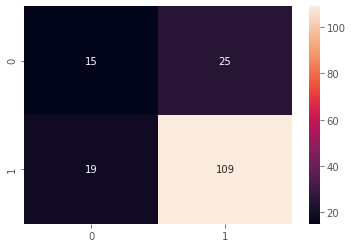

In [857]:
xgb_clf.fit(X_train, y_train)
xgb_y_trials = xgb_clf.predict(X_train)
xgb_y_pred = xgb_clf.predict(X_test)
print('Test set accuracy of xgb: {:.2f}'.format(dt_acc_test))
sns.heatmap(confusion_matrix(y_test,xgb_y_pred),annot=True,fmt="d")

Test set accuracy of dt: 0.61


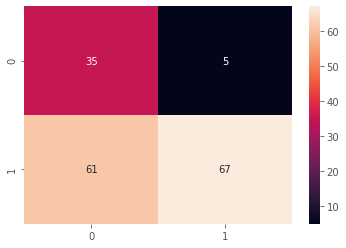

In [858]:
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_acc_test = accuracy_score(y_test, dt_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(dt_acc_test))
sns.heatmap(confusion_matrix(y_test,dt_y_pred),annot=True,fmt="d")

Test set accuracy of dt: 0.65


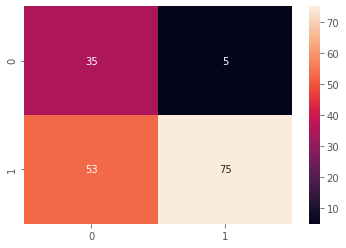

In [859]:
#Logistic Regression Accuracy
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_acc_test = accuracy_score(y_test, lr_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(lr_acc_test))
sns.heatmap(confusion_matrix(y_test,lr_y_pred),annot=True,fmt="d")


Test set accuracy of dt: 0.54


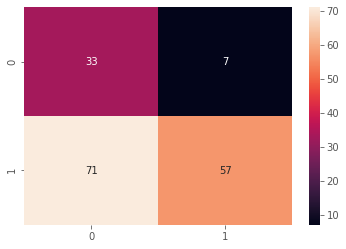

In [860]:
#KNN Accuracy
KNN_1.fit(X_train, y_train)
knn_y_pred = KNN_1.predict(X_test)
knn_acc_test = accuracy_score(y_test, knn_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(knn_acc_test)) 
sns.heatmap(confusion_matrix(y_test,knn_y_pred),annot=True,fmt="d")


In [861]:
dtree_acc=accuracy_score(y_test,knn_y_pred)
dtree_prec=precision_score(y_test,knn_y_pred)
dtree_rec=recall_score(y_test,knn_y_pred)
dtree_f1=f1_score(y_test,knn_y_pred)
# dtree_mas=mean_absolute_error(y_test,knn_y_pred)
# dtree_rms=np.sqrt(mean_squared_error(y_test,knn_y_pred))
print(classification_report(y_test,knn_y_pred))
print()


              precision    recall  f1-score   support

           0       0.32      0.82      0.46        40
           1       0.89      0.45      0.59       128

    accuracy                           0.54       168
   macro avg       0.60      0.64      0.53       168
weighted avg       0.75      0.54      0.56       168




Test set accuracy of dt: 0.73


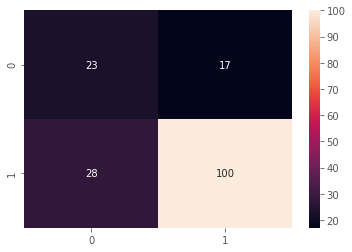

In [862]:
#Random Forest Accuracy
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_acc_test = accuracy_score(y_test, rf_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(rf_acc_test)) 
sns.heatmap(confusion_matrix(y_test,rf_y_pred),annot=True,fmt="d")


In [863]:
#Using RF to see Best Features
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
#Decided to run them all together and print them out in a for loop for Automation
for clf_name, clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

In [ ]:
#Predict Proba Scores
y_score1 = dt.predict_proba(X_test)[:,1]
y_score2 = lr.predict_proba(X_test)[:,1]
y_score3 = KNN_1.predict_proba(X_test)[:,1]
y_score4 = rf.predict_proba(X_test)[:,1]



In [864]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for KNearest Neighbors: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score4))

roc_auc_score for DecisionTree:  0.6609375
roc_auc_score for Logistic Regression:  0.7765625
roc_auc_score for KNearest Neighbors:  0.725
roc_auc_score for Random Forest:  0.77099609375


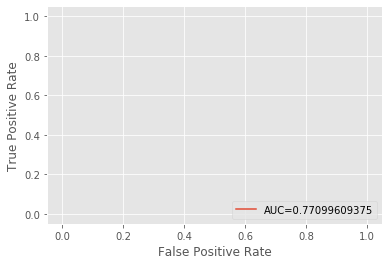

In [865]:
#define metrics
y_pred_proba_rf_auc = rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test,  y_pred_proba_rf_auc, pos_label = 2)
rf_auc = roc_auc_score(y_test, y_score4)

# plt.figure(figsize=(20,15))
# plt.title('ROC/AUC Curves',fontsize=30)

#create ROC curve
plt.plot(fpr_rf,tpr_rf,label="AUC="+str(rf_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

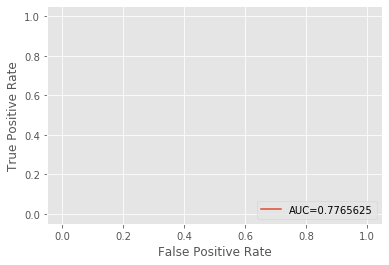

In [866]:
#define metrics
y_pred_proba_auc_lr = lr.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test,  y_pred_proba_auc_lr, pos_label = 2)
lr_auc = roc_auc_score(y_test, y_score2)


#create ROC curve
plt.plot(fpr_lr,tpr_lr,label="AUC="+str(lr_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc =4)
plt.show()

In [867]:
results = pd.DataFrame({'Model': ['Decision Tree','Logistic Regression', 'KNN','Random Forest Classifier'],
                        'Roc_Score': [roc_auc_score(y_test, y_score1), roc_auc_score(y_test, y_score2),roc_auc_score(y_test, y_score3), roc_auc_score(y_test, y_score4)],
                       'Accuracy_Score': [dt_acc_test, lr_acc_test,knn_acc_test, rf_acc_test]})
df_results = results.sort_values(by='Roc_Score', ascending=False)
df_results

,Model,Roc_Score,Accuracy_Score
1,Logistic Regression,0.776563,0.654762
3,Random Forest Classifier,0.770996,0.732143
2,KNN,0.725000,0.535714
0,Decision Tree,0.660937,0.607143


In [868]:
# importing machine learning libraries and modules
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor
from pprint import pprint
from sklearn.metrics import mean_squared_error,mean_absolute_error, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import warnings
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from time import time
import scipy.stats as stats 
import scipy.stats
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix
warnings.filterwarnings('ignore')

# creating print_metrics function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

LOGISTIC REGRESSION Test Metrics:
Precision Score: 0.9375
Recall Score: 0.5859375
Accuracy Score: 0.6547619047619048
F1 Score: 0.7211538461538461


Confusion Matrix: 
 [[35  5]
 [53 75]]

LOGISTIC REGRESSION AUC: 0.73046875

              precision    recall  f1-score   support

           0       0.40      0.88      0.55        40
           1       0.94      0.59      0.72       128

    accuracy                           0.65       168
   macro avg       0.67      0.73      0.63       168
weighted avg       0.81      0.65      0.68       168


Logistic Regression Training Score: 
 0.69
Logistic Regression Test Score: 
 0.65



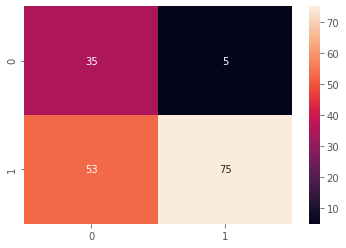

In [869]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='lbfgs', multi_class='ovr')
lg.fit(X_train,y_train)
lg_predictions=lg.predict(X_test)

# showing metrics for testing set
print('LOGISTIC REGRESSION Test Metrics:')
print_metrics(y_test, lg_predictions)
print('\n')

# showing confusion matrix of SVM algorithm
print('Confusion Matrix: \n', confusion_matrix(y_test,lg_predictions))
sns.heatmap(confusion_matrix(y_test,lg_predictions),annot=True,fmt="d")

print()
# showing auc of SVM algorithm
lg_false_positive_rate, lg_true_positive_rate, lg_thresholds = roc_curve(y_test, lg_predictions)
lg_auc = auc(lg_false_positive_rate, lg_true_positive_rate)
print('LOGISTIC REGRESSION AUC:', lg_auc)
print()

lg_acc=accuracy_score(y_test,lg_predictions)
lg_prec=precision_score(y_test,lg_predictions)
lg_rec=recall_score(y_test,lg_predictions)
lg_f1=f1_score(y_test,lg_predictions)
lg_mas=mean_absolute_error(y_test,lg_predictions)
lg_rms=np.sqrt(mean_squared_error(y_test,lg_predictions))
print(classification_report(y_test,lg_predictions ))
print()

lg_score = round(lg.score(X_train, y_train),2)
lg_score_test = round(lg.score(X_test, y_test),2) 
print('Logistic Regression Training Score: \n', lg_score)
print('Logistic Regression Test Score: \n', lg_score_test)
print()

Random Forest Test Metrics:
Precision Score: 0.8547008547008547
Recall Score: 0.78125
Accuracy Score: 0.7321428571428571
F1 Score: 0.8163265306122448


Confusion Matrix: 
 [[ 23  17]
 [ 28 100]]

Random Forest AUC: 0.678125
              precision    recall  f1-score   support

           0       0.45      0.57      0.51        40
           1       0.85      0.78      0.82       128

    accuracy                           0.73       168
   macro avg       0.65      0.68      0.66       168
weighted avg       0.76      0.73      0.74       168


Random Forest Score: 
 0.99
Random Forest Test Score: 
 0.73



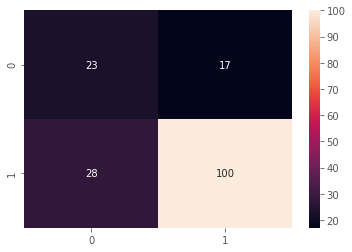

In [870]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=25,random_state=34,
                                    max_depth=16,
                                    min_samples_split=2,
                                    min_samples_leaf=2,
                                    max_features='auto')

rf_clf.fit(X_train, y_train)
rf_y_trials = rf_clf.predict(X_train)
rf_y_pred = rf_clf.predict(X_test)

# showing metrics for testing set
print('Random Forest Test Metrics:')
print_metrics(y_test, rf_y_pred)
print('\n')

# showing confusion matrix of Random Forest algorithm
print('Confusion Matrix: \n', confusion_matrix(y_test,rf_y_pred))
sns.heatmap(confusion_matrix(y_test,rf_y_pred),annot=True,fmt="d")
print()

# showing auc of Random Forest algorithm
rf_false_positive_rate, rf_true_positive_rate, rf_thesholds = roc_curve(y_test, rf_y_pred)
rf_auc = auc(rf_false_positive_rate, rf_true_positive_rate)
print('Random Forest AUC:', rf_auc)

rfc_acc=accuracy_score(y_test,rf_y_pred)
rfc_prec=precision_score(y_test,rf_y_pred)
rfc_rec=recall_score(y_test,rf_y_pred)
rfc_f1=f1_score(y_test,rf_y_pred)
rfc_mas=mean_absolute_error(y_test,rf_y_pred)
rfc_rms=np.sqrt(mean_squared_error(y_test,rf_y_pred))
print(classification_report(y_test, rf_y_pred))
print()

random_forest_score = round(rf_clf.score(X_train, y_train), 2)
random_forest_score_test = round(rf_clf.score(X_test, y_test), 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print()



Decision Tree Test Metrics:
Precision Score: 0.85
Recall Score: 0.796875
Accuracy Score: 0.7380952380952381
F1 Score: 0.8225806451612903


Confusion Matrix: 
 [[ 22  18]
 [ 26 102]]

Decision Tree AUC: 0.6734375
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        40
           1       0.85      0.80      0.82       128

    accuracy                           0.74       168
   macro avg       0.65      0.67      0.66       168
weighted avg       0.76      0.74      0.75       168


Decision Tree Score: 
 1.0
Decision Tree Test Score: 
 0.74



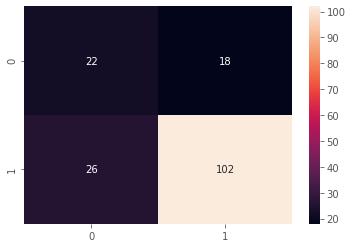

In [871]:
from sklearn.tree import DecisionTreeClassifier

# liver_final = df1.copy()
# # creating train_test_split
# X = liver_final.drop(['Liver_Disease'], axis=1)
# y = liver_final['Liver_Disease']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_predictions=dtree.predict(X_test)


# showing metrics for testing set
print('Decision Tree Test Metrics:')
print_metrics(y_test, dtree_predictions)
print('\n')

# showing confusion matrix of Decision Tree algorithm
print('Confusion Matrix: \n', confusion_matrix(y_test,dtree_predictions))
sns.heatmap(confusion_matrix(y_test,dtree_predictions),annot=True,fmt="d")
print()

# showing auc of Decision Tree algorithm
dt_false_positive_rate, dt_true_positive_rate, dt_thesholds = roc_curve(y_test, dtree_predictions)
dt_auc = auc(dt_false_positive_rate, dt_true_positive_rate)
print('Decision Tree AUC:', dt_auc)


########################

#Predict Proba Scores
y_score1 = dtree.predict_proba(X_test)[:,1]

#define metrics
# y_pred_proba_dt_auc = dtree.predict_proba(X_test)[::,1]
# fpr_dt, tpr_dt, _ = roc_curve(y_test,  y_pred_proba_dt_auc, pos_label = 2)
# dt_auc = roc_auc_score(y_test, y_score1)
# print("new:",dt_auc)
##################

dtree_acc=accuracy_score(y_test,dtree_predictions)
dtree_prec=precision_score(y_test,dtree_predictions)
dtree_rec=recall_score(y_test,dtree_predictions)
dtree_f1=f1_score(y_test,dtree_predictions)
dtree_mas=mean_absolute_error(y_test,dtree_predictions)
dtree_rms=np.sqrt(mean_squared_error(y_test,dtree_predictions))
print(classification_report(y_test,dtree_predictions))
print()

dt_score = round(dtree.score(X_train, y_train), 2)
dt_test = round(dtree.score(X_test, y_test), 2)
print('Decision Tree Score: \n', dt_score)
print('Decision Tree Test Score: \n', dt_test)
print()




Text(0, 0.5, 'Error Rate')

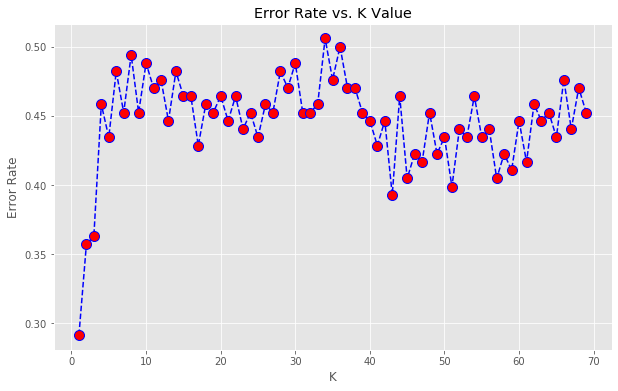

In [872]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# FINDING OUT THE K VALUE FOR LEAST ERROR RATE

for i in range(1,70):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [873]:
min(error_rate)

0.2916666666666667

In [874]:
# error_rate

WITH K=1


KNN Test Metrics:
Precision Score: 0.8062015503875969
Recall Score: 0.8125
Accuracy Score: 0.7083333333333334
F1 Score: 0.8093385214007781


Confusion Matrix: 
 [[ 15  25]
 [ 24 104]]

KNN AUC: 0.59375
              precision    recall  f1-score   support

           0       0.38      0.38      0.38        40
           1       0.81      0.81      0.81       128

    accuracy                           0.71       168
   macro avg       0.60      0.59      0.59       168
weighted avg       0.71      0.71      0.71       168


KNN Score: 
 1.0
KNN Test Score: 
 0.71



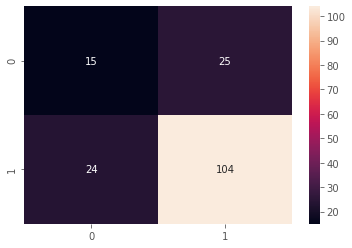

In [875]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

print('WITH K=1')
print('\n')

# showing metrics for testing set
print('KNN Test Metrics:')
print_metrics(y_test, knn_predictions)
print('\n')

# showing confusion matrix of KNN algorithm
print('Confusion Matrix: \n', confusion_matrix(y_test,knn_predictions))
sns.heatmap(confusion_matrix(y_test,knn_predictions),annot=True,fmt="d")
print()

# showing auc of KNN algorithm
knn_false_positive_rate, knn_true_positive_rate, knn_thesholds = roc_curve(y_test, knn_predictions)
knn_auc = auc(knn_false_positive_rate, knn_true_positive_rate)
print('KNN AUC:', knn_auc)


# y_score3 = knn.predict_proba(X_test)[:,1]
#define metrics
# y_pred_proba_knn_auc = knn.predict_proba(X_test)[::,1]
# fpr_knn, tpr_knn, _ = roc_curve(y_test,  y_pred_proba_knn_auc, pos_label = 2)
# knn_auc = roc_auc_score(y_test, y_score3)
# print("new:",knn_auc)

knn_acc=accuracy_score(y_test,knn_predictions)
knn_prec=precision_score(y_test,knn_predictions)
knn_rec=recall_score(y_test,knn_predictions)
knn_f1=f1_score(y_test,knn_predictions)
knn_mas=mean_absolute_error(y_test,knn_predictions)
knn_rms=np.sqrt(mean_squared_error(y_test,knn_predictions))
print(classification_report(y_test,knn_predictions))
print()

# knn_score = round(knn.score(X_train, y_train), 2)
knn_test = round(knn.score(X_test, y_test) , 2)
print('KNN Score: \n', knn_score)
print('KNN Test Score: \n', knn_test)
print()

XGBoost Test Metrics:
Precision Score: 0.8396946564885496
Recall Score: 0.859375
Accuracy Score: 0.7678571428571429
F1 Score: 0.8494208494208494


Confusion Matrix: 
 [[ 19  21]
 [ 18 110]]

XGBoost AUC: 0.6671875
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        40
           1       0.84      0.86      0.85       128

    accuracy                           0.77       168
   macro avg       0.68      0.67      0.67       168
weighted avg       0.76      0.77      0.76       168


XGBoost Score: 
 1.0
XGBoost Test Score: 
 0.77



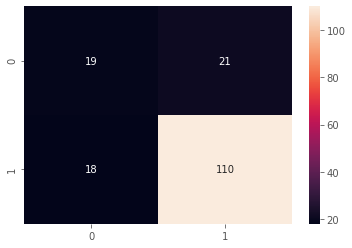

In [876]:
# instantiatinng, fitting, and predicting using eXtreme Gradient Boosting algorithm model


xgb_clf = xgb.XGBClassifier(max_depth=9,                             
                            n_estimators=509,
                            learning_rate=0.1,
                            random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_y_trials = xgb_clf.predict(X_train)
xgb_y_pred = xgb_clf.predict(X_test)
# print(accuracy_score(y_test,xgb_y_pred))

# showing metrics for testing set
print('XGBoost Test Metrics:')
print_metrics(y_test, xgb_y_pred)
print('\n')

# showing confusion matrix of XGBoost algorithm
print('Confusion Matrix: \n', confusion_matrix(y_test,xgb_y_pred))
sns.heatmap(confusion_matrix(y_test,xgb_y_pred),annot=True,fmt="d")
print()

# showing auc of XGBoost algorithm
xgb_false_positive_rate, xgb_true_positive_rate, xgb_thesholds = roc_curve(y_test, xgb_y_pred)
xgb_auc = auc(xgb_false_positive_rate, xgb_true_positive_rate)
print('XGBoost AUC:', xgb_auc)

xgb_acc=accuracy_score(y_test,xgb_y_pred)
xgb_prec=precision_score(y_test,xgb_y_pred)
xgb_rec=recall_score(y_test,xgb_y_pred)
xgb_f1=f1_score(y_test,xgb_y_pred)
# xgb_mas=mean_absolute_error(y_test,xgb_y_pred)
# xgb_rms=np.sqrt(mean_squared_error(y_test,xgb_y_pred))
print(classification_report(y_test,xgb_y_pred))
print()

xgb_score = round(xgb_clf.score(X_train, y_train), 2)
xgb_test = round(xgb_clf.score(X_test, y_test), 2)
print('XGBoost Score: \n', xgb_score)
print('XGBoost Test Score: \n', xgb_test)
print()

Neural Networks  Test Metrics:
Precision Score: 0.9367088607594937
Recall Score: 0.578125
Accuracy Score: 0.6488095238095238
F1 Score: 0.7149758454106279


Confusion Matrix: 
 [[35 54]
 [ 5 74]]

Neural Networks  AUC: 0.7265625
              precision    recall  f1-score   support

           0       0.39      0.88      0.54        40
           1       0.94      0.58      0.71       128

    accuracy                           0.65       168
   macro avg       0.66      0.73      0.63       168
weighted avg       0.81      0.65      0.67       168


Neural Score: 
 0.7
Neural Test Score: 
 0.65

Accuracy: 
 0.6488095238095238


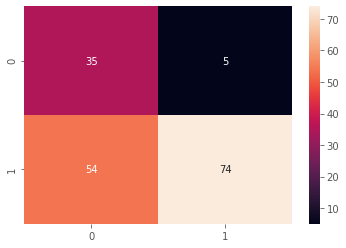

In [877]:

from sklearn.neural_network import MLPClassifier

# Neural Networks# Neural 
neural = MLPClassifier(hidden_layer_sizes=40,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=137,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
neural.fit(X_train, y_train)
#Predict Output
predicted = neural.predict(X_test)


# showing metrics for testing set
print('Neural Networks  Test Metrics:')
print_metrics(y_test, predicted)
print('\n')

# showing confusion matrix of AdaBoost  algorithm
print('Confusion Matrix: \n', confusion_matrix(predicted,y_test))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt="d")
print()

# showing auc of Neural Networks  algorithm
neural_false_positive_rate, neural_true_positive_rate, neural_thesholds = roc_curve(y_test, predicted)
neural_auc = auc(neural_false_positive_rate, neural_true_positive_rate)
print('Neural Networks  AUC:', neural_auc)

neural_acc=accuracy_score(y_test,predicted)
neural_prec=precision_score(y_test,predicted)
neural_rec=recall_score(y_test,predicted)
neural_f1=f1_score(y_test,predicted)
neural_mas=mean_absolute_error(y_test,predicted)
neural_rms=np.sqrt(mean_squared_error(y_test,predicted))
print(classification_report(y_test,predicted))
print()

neural_score = round(neural.score(X_train, y_train) , 2)
neural_score_test = round(neural.score(X_test, y_test) , 2)
print('Neural Score: \n', neural_score)
print('Neural Test Score: \n', neural_score_test)
print()
print('Accuracy: \n', accuracy_score(y_test, predicted))



In [878]:
# We can now rank our evaluation of all the models to choose the best one for our problem.

models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Random Forest','Decision Tree', 'KNN', 'XGBoost', 'Neural Networks'],
#     'Score': [lg_score, random_forest_score,dt_score, knn_score,xgb_score,neural_score],
    'Test Score': [ lg_score_test, random_forest_score_test,dt_test, knn_test, xgb_test, neural_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
4,XGBoost,0.77
2,Decision Tree,0.74
1,Random Forest,0.73
3,KNN,0.71
0,Logistic Regression,0.65
5,Neural Networks,0.65


In [879]:
d={'Model':['Logistic Regression', 'Random Forest Classifier','Decision Tree Classifier','KNN', 'XGBoost','Multi-layer Perceptron Classifier '],
   'Accuracy_Score (%)':[lg_acc*100, rfc_acc*100,dtree_acc*100,knn_acc*100, xgb_acc*100,neural_acc*100],
   'Precision_Score (%)':[lg_prec*100, rfc_prec*100,dtree_prec*100,knn_prec*100, xgb_prec*100, neural_prec*100],
   'Recall_Score (%)':[lg_rec*100, rfc_rec*100,dtree_rec*100,knn_rec*100, xgb_rec*100, neural_rec*100],
   'F1_Score (%)':[lg_f1*100,rfc_f1*100,dtree_f1*100,knn_f1*100, xgb_f1*100, neural_f1*100]}
results=pd.DataFrame(d)
results

,Model,Accuracy_Score (%),Precision_Score (%),Recall_Score (%),F1_Score (%)
0,Logistic Regression,65.476190,93.750000,58.59375,72.115385
1,Random Forest Classifier,73.214286,85.470085,78.12500,81.632653
2,Decision Tree Classifier,73.809524,85.000000,79.68750,82.258065
3,KNN,70.833333,80.620155,81.25000,80.933852
4,XGBoost,76.785714,83.969466,85.93750,84.942085
5,Multi-layer Perceptron Classifier,64.880952,93.670886,57.81250,71.497585


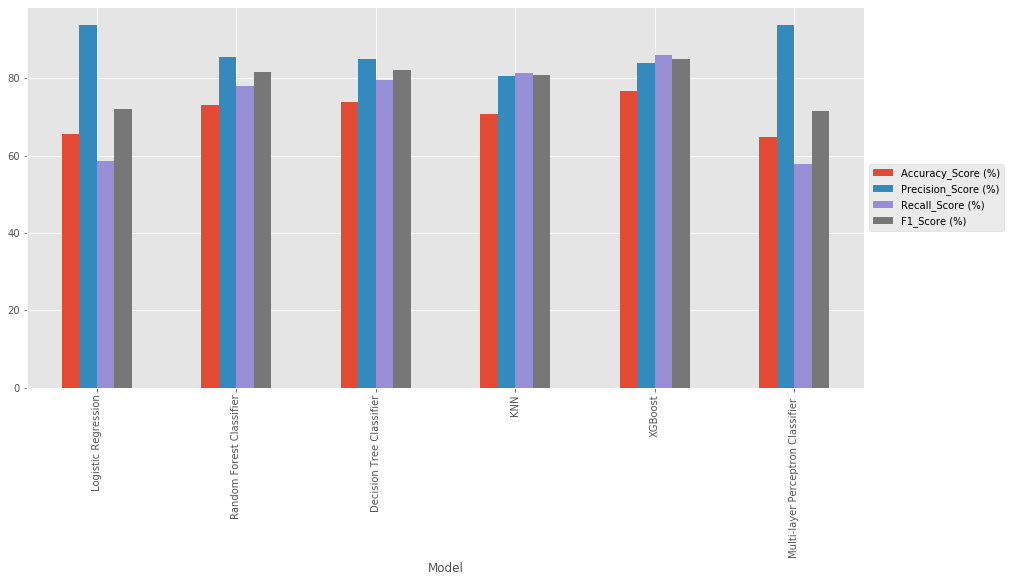

In [880]:
results.plot.bar(x='Model',figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

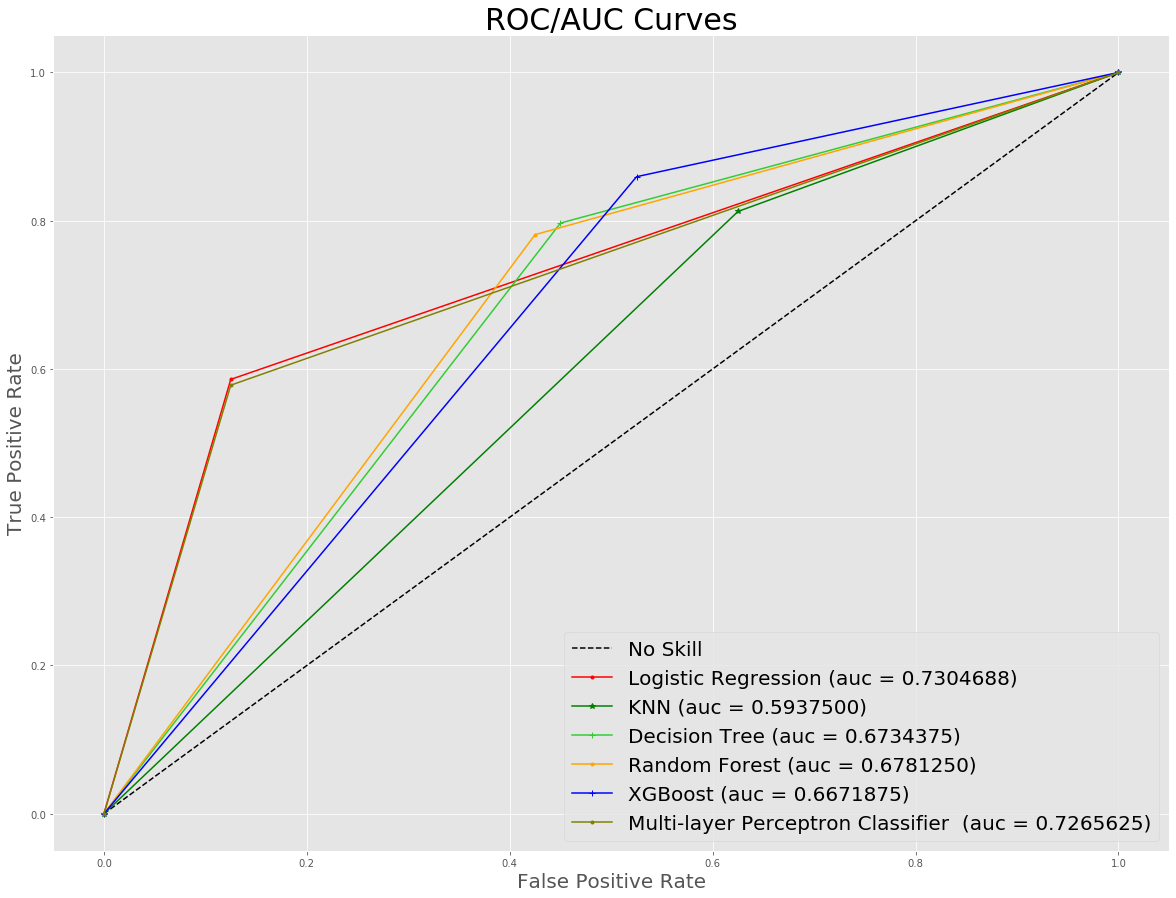

In [881]:
# creating no skill line
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

plt.figure(figsize=(20,15))
plt.title('ROC/AUC Curves',fontsize=30)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, color='black', linestyle='--', label='No Skill')
plt.plot(lg_false_positive_rate, lg_true_positive_rate, color='red', linestyle='-', marker='.', label='Logistic Regression (auc = %0.7f)' % lg_auc)
plt.plot(knn_false_positive_rate, knn_true_positive_rate, color='green', linestyle='-', marker='*', label='KNN (auc = %0.7f)' % knn_auc)
plt.plot(dt_false_positive_rate, dt_true_positive_rate, color='limegreen', linestyle='-', marker='+', label='Decision Tree (auc = %0.7f)' % dt_auc)
plt.plot(rf_false_positive_rate, rf_true_positive_rate, color='orange', linestyle='-', marker='.', label='Random Forest (auc = %0.7f)' % rf_auc)
# plt.plot(gbm_false_positive_rate, gbm_true_positive_rate, color='purple', linestyle='-', marker='*', label='GBM (auc = %0.7f)' % gbm_auc)
plt.plot(xgb_false_positive_rate, xgb_true_positive_rate, color='blue', linestyle='-', marker='+', label='XGBoost (auc = %0.7f)' % xgb_auc)
# plt.plot(adb_false_positive_rate, adb_true_positive_rate, color='olive', linestyle='-', marker='.', label='AdaBoost (auc = %0.5f)' % adb_auc)
plt.plot(neural_false_positive_rate, neural_true_positive_rate, color='olive', linestyle='-', marker='.', label='Multi-layer Perceptron Classifier  (auc = %0.7f)' % neural_auc)


# axis labels
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

# show the legend
plt.legend(prop={'size': 20})


# show the plot
plt.show()